## <p style="text-align: right;"> &#9989; Enzo Cereghino</p>

# CMSE 202 Final (Section 003 - Fall 2023)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. 

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You can also use any publicly available generative AI tool, if you find such a tool to be useful, **but you must properly cite the tool in your exam submission if you do so**.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

The maximum number of points is: **46 Points**


---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Enzo Cereghino**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (4 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-f23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f23-turnin`" repository inside the `final` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
git clone https://github.com/Enzo-Cereghino/CMSE202-f23-turnin.git

```

---
## Part 2: Generate a network graph from data (11 points)

&#9989; **Question 2.1 (2 points)** The adjacency matrix for a water supply network (**'h2o_adj.txt'**) is provided where the nodes are water stations and edges represent pipes between them. When a pair of nodes are connected with each other, there exists a pipe supplying the water between them. 

In addition, the 2D coordinates of the water stations are provided in `h2o_position.txt' in an arbitrary coordinate system.  

Download and load the data from 'h2o_adj.txt' and `h2o_position.txt' 

**You can download the files from here:**

https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_adj.txt

https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_position.txt


In [3]:
# Put your code here:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_adj.txt -O
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_position.txt -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3240  100  3240    0     0    644      0  0:00:05  0:00:05 --:--:--   700
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1620  100  1620    0     0    322      0  0:00:05  0:00:05 --:--:--   338


&#9989; **Question 2.2 (3 points)** Now, construct a graph using Networkx. Display the graph and use the position information to place the water stations at the correct locations. 


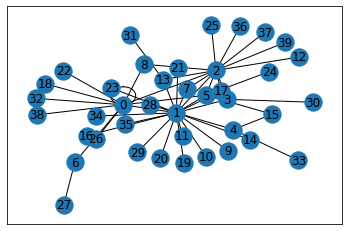

In [25]:
# Put your code here:
import matplotlib.pyplot as plt
import numpy as np
import csv
import networkx as nx

adj_h2o = np.loadtxt('h2o_adj.txt', delimiter = ',')
pos_h2o = np.loadtxt('h2o_position.txt', delimiter = ',')
G = nx.from_numpy_array(adj_h20)

nx.draw_networkx(G, pos = pos_h2o)

&#9989; **Question 2.3 (2 points)** Print the total number of nodes in the network and the number of edges


In [27]:
# Put your code here:
print(40, "Nodes")
print(G.number_of_edges(), "Edges")

40 Nodes
50 Edges


&#9989; **Question 2.4 (2 points)** In the interest of having an efficient water delivery system, we would like to know the shortest path (in terms of fewest number of edges) from one water station to another station.  Networkx has a convenient method to find these paths.  Using this method, answer the following questions:  
* Taking the shortest path, how many nodes are in-between node 27 and 20?  
* Likewise, taking the shortest path, how many edges (water pipes) are in-between node 27 and 20?


In [29]:
# Put your code and answer here
shortest_path = nx.shortest_path(G, source=27, target = 20)
print("Shortest Path Nodes", shortest_path)
shortest_path_length = nx.shortest_path_length(G, source=27, target=20)
print("Length of shortest path:", shortest_path_length)


Shortest Path Nodes [27, 6, 0, 1, 20]
Length of shortest path: 4


&#9989; **Question 2.5 (1 point)** Taking this shortest path between node 27 and 20, what is the physical distance between these water stations?  In other words, how long is the pipe that runs along this shortest path?  

Hint: Use the information in the position data file to determine the physical (euclidean) distance between nodes.

Note: If you are stumped on this, recommend completing other sections of exam before working on this (only worth 1 point).  


In [34]:
# Put your code and answer here
pos_27=pos_h2o[27]
pos_20 = pos_h20[20]

Distance = np.sqrt((pos_27[0]-pos_20[0])**2 +(pos_27[1]-pos_20[1])**2)
print(Distance)

0.6971944287547525


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**
m
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Perform a regression analysis on data (19 points)

 <img src="https://www.egr.msu.edu/~aalessio/imgs/the-proportions-of-the-human-figure-leonardo-da-vinci.png"
     alt="da vinci human"
     align="right"  
     width="150" /> 

<a href="https://en.wikipedia.org/wiki/Anthropometry">**Anthropometry**</a> is the scientific study of the measurements and proportions of the human body.  This field has a critical role in several industries including clothing design, ergonomics, healthcare, consumer safety, and architecture. 


The "anthrokids3_subset.csv" file contains measurements on over 1700 children with 5 columns with the following measures: 

**[Age (years), Weight (kg), Height (cm),  Waist Circumference (cm) ,Head Circumference (cm)]**  

These data are a subset of the data acquired in the <a href="http://mreed.umtri.umich.edu/mreed/downloads.html#child_anthro">Synder et al, 1975: ANTHROPOMETRY OF INFANTS,CHILDREN, AND YOUTHS TO AGE 18 FOR PRODUCT SAFETY DESIGN,</a> performed by the U.S. Consumer Product Safety Commission to design some of the original car seats for children. 

The dataset is available here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/anthrokids3_subset.csv`

&#9989; **Question 3.1 (2 points)**: To get started, **download the `anthrokids3_subset.csv` file and place it in the same directory as your notebook**, then **read in the `anthrokids3_subset.csv` dataset** and finally **display the first and last few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [35]:
### Put your code for Question 3.1 here
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/anthrokids3_subset.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48947  100 48947    0     0   9732      0  0:00:05  0:00:05 --:--:-- 10908


In [37]:
import pandas as pd
dataset = pd.read_csv('anthrokids3_subset.csv')
dataset

,age,weight,height,waist_circum,head_circum
0,4.219,15.5,103.3,47.5,49.8
1,4.326,17.6,103.9,49.8,50.6
2,4.476,23.0,111.2,52.0,51.2
3,3.841,16.5,99.7,49.1,48.9
4,3.460,15.0,99.7,46.5,47.3
...,...,...,...,...,...
1772,4.704,20.1,108.6,57.4,52.8
1773,4.131,17.8,100.8,50.6,49.7
1774,5.120,21.7,114.9,53.1,51.2
1775,5.342,20.7,112.1,52.9,51.9


&#9989; **Question 3.2 (3 points)**: **Make a scatter plot** with the `height` on the $y$-axis and the `age` on the $x$-axis. **Be sure to label your axes appropriately.**

Text(0.5, 1.0, 'Height vs Age')

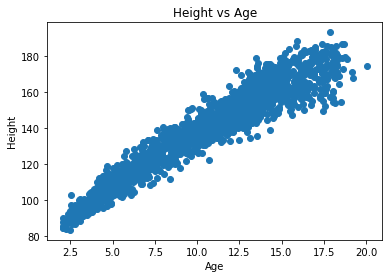

In [41]:
### Put your code for Question 3.2 here
import matplotlib.pyplot as plt

plt.scatter(dataset['age'], dataset['height'])
plt.ylabel('Height')
plt.xlabel('Age')
plt.title('Height vs Age')

&#9989; **Question 3.3 (5 points)**: Using the `OLS` method in `statsmodels`, **perform ordinary least squares regression** with `age` as the independent variable and `height` as the dependent variable. **Display the results summary**.

In [43]:
### Put your code for Question 3.3 here
import statsmodels.api as sm
x_with_cnst = sm.add_constant(dataset['age'])
model = sm.OLS(dataset['height'], x_with_cnst)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.868e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:46:53   Log-Likelihood:                -5991.9
No. Observations:                1777   AIC:                         1.199e+04
Df Residuals:                    1775   BIC:                         1.200e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.0976      0.453    181.046      0.0

&#9989; **Question 3.4 (1 points)**: **Based solely on the OLS results summary**, does a linear model fit this data well? Briefly justify your answer, **in your own words**, using details from the OLS results summary.

<font size=+3>&#9998;</font> The data fits very well, with a R sqaured value of 0.913 age is a great indicator for height. The closer to 1 the better. 

&#9989; **Question 3.5 (2 points)**: **Based solely on the OLS results summary**, what is the relationship between height and age.  In other words, what is the model (i.e., equation) that relates these variables.  Below, you should complete $height = ????$

<font size=+3>&#9998;</font> 

Height = 5.444*age + 82.0976

&#9989; **Question 3.6 (2 points)**: Make a plot of the original data of height vs age (same as scatter plot above) and add the display of the fitted function returned from OLS above.  You can use any method available to make this display.   **Be sure to label your axes appropriately.**

Text(0.5, 1.0, 'Height vs Age')

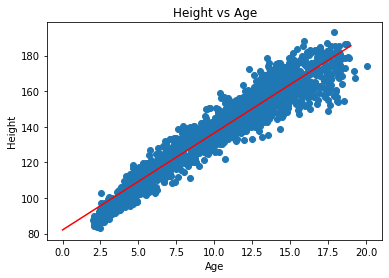

In [49]:
### Put your code for Question 3.6 here
y=[]
age = np.arange(0,20,1)
for i in range(20):
    y.append(5.444*i + 82.0976)
    
plt.scatter(dataset['age'], dataset['height'])
plt.plot(age, y, color = 'red')
plt.ylabel('Height')
plt.xlabel('Age')
plt.title('Height vs Age')

&#9989; **Question 3.7 (3 points)**: Perform multiple regression with this data set to predict height from age and one additional variable.  Basically, make a model of how height is related to age and one other variable of your choosing from the dataset.  

In [54]:
# Put your code for Question 3.7 here
x_arry = dataset.drop(['height','waist_circum','head_circum'], axis = 1)
x_with_cnst2 = sm.add_constant(x_arry)
model2 = sm.model = sm.OLS(dataset['height'], x_with_cnst2)
results =model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:57:21   Log-Likelihood:                -5653.4
No. Observations:                1777   AIC:                         1.131e+04
Df Residuals:                    1774   BIC:                         1.133e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6195      0.375    220.117      0.0

&#9989; **Question 3.8 (1 points)**: Is your multiple regression model better than your single regression model of height vs age?  **In your own words**, provide a justification for your conclusion.

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Perform a support vector machine (SVM) classification on data (13 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to identify the age group (as young, middle, old) of the subjects in the anthrokids data set.   


&#9989; To get started, **run the code cell below**. This loads the anthrokids dataset, and divides it into features and labels.  stores the features into a numpy array called `anthro_features` and stores the class labels into a numpy array called `anthro_labels`

In [ ]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
import pandas as pd
anthrokids = pd.read_csv('anthrokids3_subset.csv')
anthro_features = anthrokids.drop(columns=['age'])

anthrokids["age_group"] = pd.qcut(anthrokids["age"],3,labels=["young","middle","older"])
anthro_labels=anthrokids['age_group']
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

&#9989; **Question 4.1 (2 points)**: For this dataset, using complete sentences, print the number of different features in this data and the number of different subjects.


In [ ]:
### Put your code for Question 4.1 here

Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.2 (3 points)**: **Use the `train_test_split()` method** from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.75` and `random_state` of `2023`. You should now have a training and a testing set with "labels" and "features" each. Finally, **print the shape of your training features and testing features** to verify that your train-test-split did what it was supposed to.

In [ ]:
### Put your code for Question 4.2 here

&#9989; **Question 4.3 (6 points)**: **Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `rbf` kernel and set the hyper-parameter `C=10` and `gamma=0.001.` **Fit your training set** and use the resulting fit to  **predict your the testing set** so you get predicted labels for the testing set. Finally, **print the performance statistics** on the testing set using the `confusion_matrix()` and `classification_report()` methods.

In [ ]:
### Put your code for Question 4.3 here

---

&#9989; **Question 4.4 (2 point)**: Answer the following questions in your own words:

A. Does this classifier work well?  

B. Roughly what percentage of the time did the classifier predict the correct label on the testing set?  



<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

In [ ]:
### Put your code for Question 4.4 here

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L.